In [1]:
import os
import sklearn
import tempfile

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
# Kaggle Credit Card Fraud data set

file = tf.keras.utils
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
raw_df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V26', 'V27', 'V28', 'Amount', 'Class']].describe()

,Time,V1,V2,V3,V4,V5,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# Examine the class label imbalance

neg, pos = np.bincount(raw_df['Class'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 284807
    Positive: 492 (0.17% of total)



In [6]:
# Clean, split and normalize the data

cleaned_df = raw_df.copy()

cleaned_df.pop('Time')

eps = 0.001 
cleaned_df['Log Ammount'] = np.log(cleaned_df.pop('Amount') + eps)

In [7]:
train_df, test_df = train_test_split(cleaned_df, test_size = 0.2)
train_df, val_df = train_test_split(train_df, test_size = 0.2)

train_labels = np.array(train_df.pop('Class'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [8]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (182276,)
Validation labels shape: (45569,)
Test labels shape: (56962,)
Training features shape: (182276, 29)
Validation features shape: (45569, 29)
Test features shape: (56962, 29)


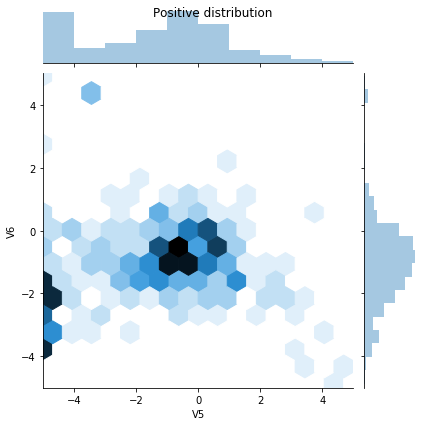

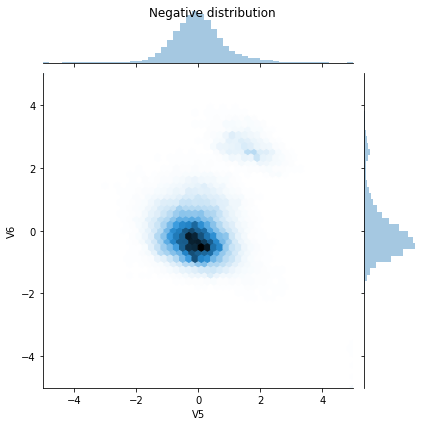

In [9]:
# Look at the data distribution

pos_df = pd.DataFrame(train_features[ bool_train_labels], columns = train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns = train_df.columns)

sns.jointplot(pos_df['V5'], pos_df['V6'],
              kind='hex', xlim = (-5,5), ylim = (-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(neg_df['V5'], neg_df['V6'],
              kind='hex', xlim = (-5,5), ylim = (-5,5))
_ = plt.suptitle("Negative distribution")

In [10]:
# Define Model and Metrics

METRICS = [
      keras.metrics.TruePositives(name = 'tp'),
      keras.metrics.FalsePositives(name = 'fp'),
      keras.metrics.TrueNegatives(name = 'tn'),
      keras.metrics.FalseNegatives(name = 'fn'), 
      keras.metrics.BinaryAccuracy(name = 'accuracy'),
      keras.metrics.Precision(name = 'precision'),
      keras.metrics.Recall(name = 'recall'),
      keras.metrics.AUC(name = 'auc'),
]

def make_model(metrics = METRICS, output_bias = None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation = 'relu',
          input_shape = (train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation = 'sigmoid',
                         bias_initializer = output_bias),
  ])

  model.compile(
      optimizer = keras.optimizers.Adam(lr = 1e-3),
      loss = keras.losses.BinaryCrossentropy(),
      metrics = metrics)

  return model

In [11]:
EPOCHS = 10
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_auc', 
    verbose = 1,
    patience = 10,
    mode = 'max',
    restore_best_weights = True)

In [12]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


In [13]:
# See initial bias

results = model.evaluate(train_features, train_labels, batch_size = BATCH_SIZE, verbose = 0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.5077


In [14]:
initial_bias = np.log([pos/neg])
initial_bias

array([-6.35935934])

In [15]:
model = make_model(output_bias = initial_bias)
model.predict(train_features[:10])

array([[0.0010803 ],
       [0.00112177],
       [0.00155939],
       [0.00090737],
       [0.00183216],
       [0.00218993],
       [0.00119725],
       [0.00144957],
       [0.00134101],
       [0.00092034]], dtype=float32)

In [16]:
results = model.evaluate(train_features, train_labels, batch_size = BATCH_SIZE, verbose = 0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.0140


In [17]:
# Checkpoint weights

initial_weights = os.path.join(tempfile.mkdtemp(),'initial_weights')
model.save_weights(initial_weights)

In [18]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size = BATCH_SIZE,
    epochs = 20,
    validation_data = (val_features, val_labels), 
    verbose = 0)

In [19]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size = BATCH_SIZE,
    epochs = 20,
    validation_data = (val_features, val_labels), 
    verbose = 0)

In [20]:
def plot_loss(history, label, n):
  # Use a log scale to show the wide range of values.
  plt.semilogy(history.epoch,  history.history['loss'],
               color = colors[n], label = 'Train '+label)
  plt.semilogy(history.epoch,  history.history['val_loss'],
          color = colors[n], label = 'Val '+label,
          linestyle = "--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  
  plt.legend()

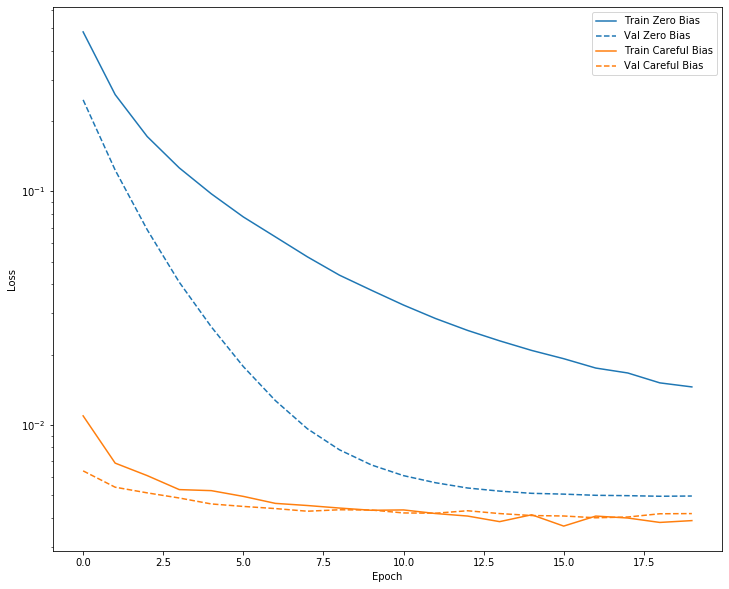

In [21]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [22]:
# Train

model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    callbacks = [early_stopping],
    validation_data = (val_features, val_labels))

Train on 182276 samples, validate on 45569 samples
Epoch 1/10
182276/182276 [==============================] - 3s 15us/sample - loss: 0.0109 - tp: 32.0000 - fp: 30.0000 - tn: 181922.0000 - fn: 292.0000 - accuracy: 0.9982 - precision: 0.5161 - recall: 0.0988 - auc: 0.7348 - val_loss: 0.0066 - val_tp: 19.0000 - val_fp: 6.0000 - val_tn: 45486.0000 - val_fn: 58.0000 - val_accuracy: 0.9986 - val_precision: 0.7600 - val_recall: 0.2468 - val_auc: 0.8696
Epoch 2/10
182276/182276 [==============================] - 1s 4us/sample - loss: 0.0075 - tp: 109.0000 - fp: 28.0000 - tn: 181924.0000 - fn: 215.0000 - accuracy: 0.9987 - precision: 0.7956 - recall: 0.3364 - auc: 0.8586 - val_loss: 0.0054 - val_tp: 35.0000 - val_fp: 8.0000 - val_tn: 45484.0000 - val_fn: 42.0000 - val_accuracy: 0.9989 - val_precision: 0.8140 - val_recall: 0.4545 - val_auc: 0.8698
Epoch 3/10
182276/182276 [==============================] - 1s 4us/sample - loss: 0.0061 - tp: 150.0000 - fp: 30.0000 - tn: 181922.0000 - fn: 174.000

In [23]:
def plot_metrics(history):
  metrics =  ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color = colors[0], label = 'Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color = colors[0], linestyle = "--", label = 'Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

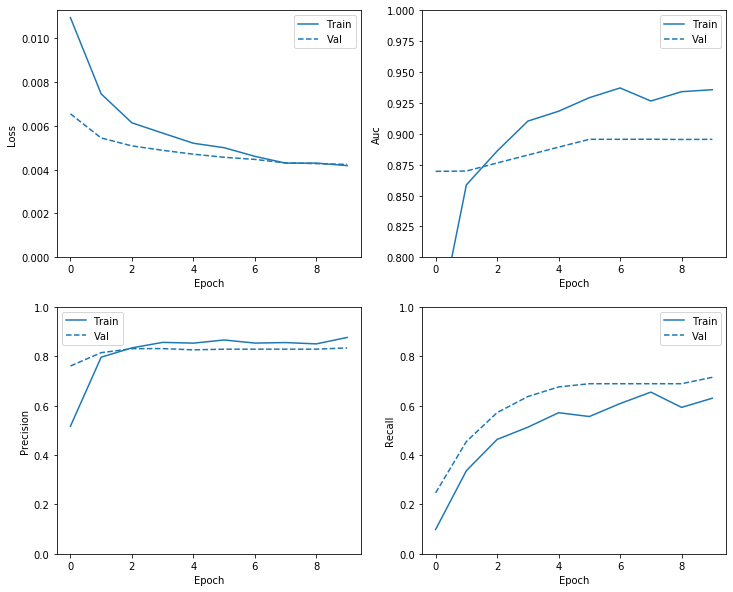

In [24]:
plot_metrics(baseline_history)

In [25]:
train_predictions_baseline = model.predict(train_features, batch_size = BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size = BATCH_SIZE)

In [26]:
def plot_cm(labels, predictions, p = 0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize = (5,5))
  sns.heatmap(cm, annot = True, fmt = "d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss :  0.0027465073285381884
tp :  68.0
fp :  9.0
tn :  56862.0
fn :  23.0
accuracy :  0.9994382
precision :  0.8831169
recall :  0.74725276
auc :  0.94468814

Legitimate Transactions Detected (True Negatives):  56862
Legitimate Transactions Incorrectly Detected (False Positives):  9
Fraudulent Transactions Missed (False Negatives):  23
Fraudulent Transactions Detected (True Positives):  68
Total Fraudulent Transactions:  91


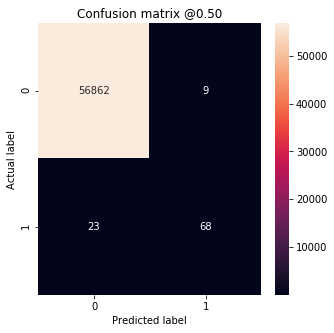

In [27]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size = BATCH_SIZE, verbose = 0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

In [28]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label = name, linewidth = 2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

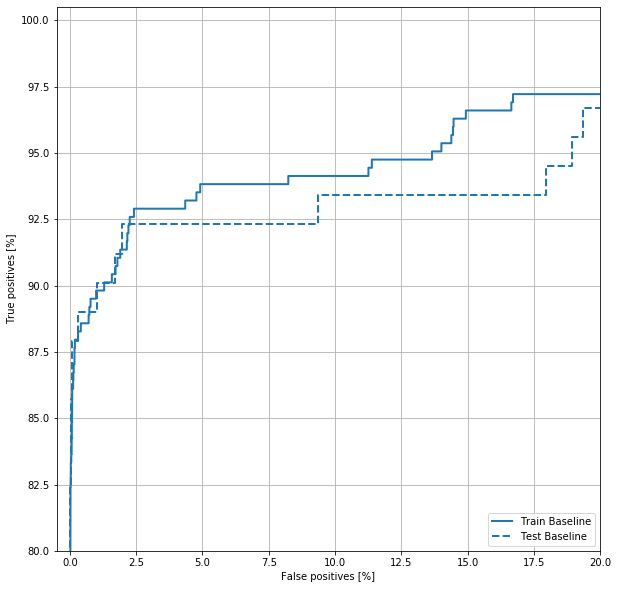

In [29]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color = colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color = colors[0], linestyle = '--')
plt.legend(loc = 'lower right')

### Calculate class weights

The goal is to identify fradulent transactions, but you don't have very many of those positive samples to work with, so you would want to have the classifier heavily weight the few examples that are available. You can do this by passing Keras weights for each class through a parameter. These will cause the model to "pay more attention" to examples from an under-represented class.

In [30]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.

weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.50
Weight for class 1: 289.44


In [31]:
# Train a model with class weights

weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    callbacks = [early_stopping],
    validation_data = (val_features, val_labels),
    class_weight = class_weight) 

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 182276 samples, validate on 45569 samples
Epoch 1/10
182276/182276 [==============================] - 3s 16us/sample - loss: 2.2613 - tp: 52.0000 - fp: 118.0000 - tn: 181834.0000 - fn: 272.0000 - accuracy: 0.9979 - precision: 0.3059 - recall: 0.1605 - auc: 0.7456 - val_loss: 1.0990 - val_tp: 31.0000 - val_fp: 10.0000 - val_tn: 45482.0000 - val_fn: 46.0000 - val_accuracy: 0.9988 - val_precision: 0.7561 - val_recall: 0.4026 - val_auc: 0.8651
Epoch 2/10
182276/182276 [==============================] - 1s 4us/sample - loss: 1.1388 - tp: 155.0000 - fp: 324.0000 - tn: 181628.0000 - fn: 169.0000 - accuracy: 0.9973 - precision: 0.3236 - recall: 0.4784 - auc: 0.8672 - val_loss: 0.7218 - val_tp: 55.0000 - val_fp: 25.0000 - val_tn: 45467.0000 - val_fn: 22.0000 - val_accuracy: 0.9990 - val_precision: 0.6875 - val_recall: 0.7143 - val_auc: 0.9048
Epoch 3/10
182276/182276 [==============================] - 1s 4us/sample - loss: 0.7098 - tp: 

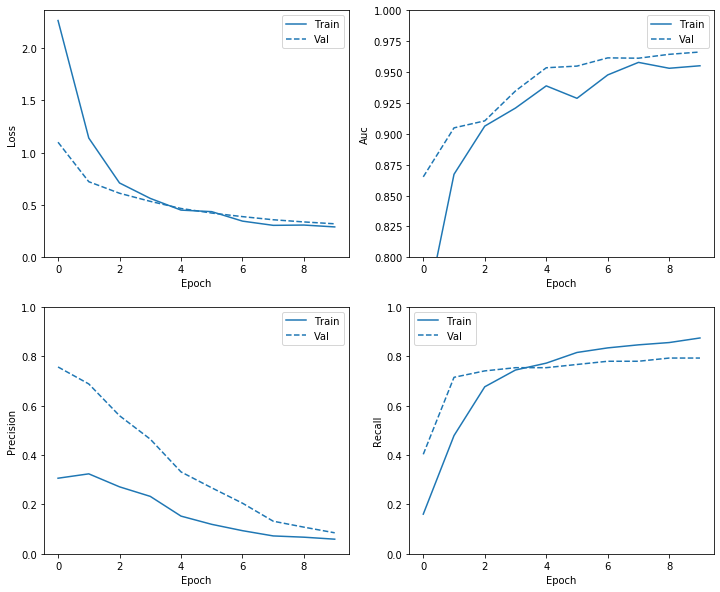

In [32]:
plot_metrics(weighted_history)

In [33]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size = BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size = BATCH_SIZE)

loss :  0.054289142501424956
tp :  83.0
fp :  837.0
tn :  56034.0
fn :  8.0
accuracy :  0.98516554
precision :  0.09021739
recall :  0.9120879
auc :  0.9769509

Legitimate Transactions Detected (True Negatives):  56034
Legitimate Transactions Incorrectly Detected (False Positives):  837
Fraudulent Transactions Missed (False Negatives):  8
Fraudulent Transactions Detected (True Positives):  83
Total Fraudulent Transactions:  91


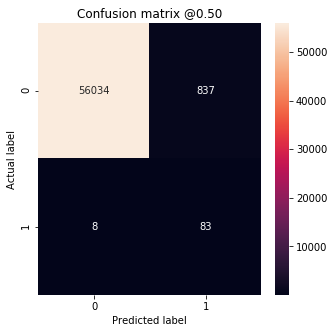

In [34]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size = BATCH_SIZE, verbose = 0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

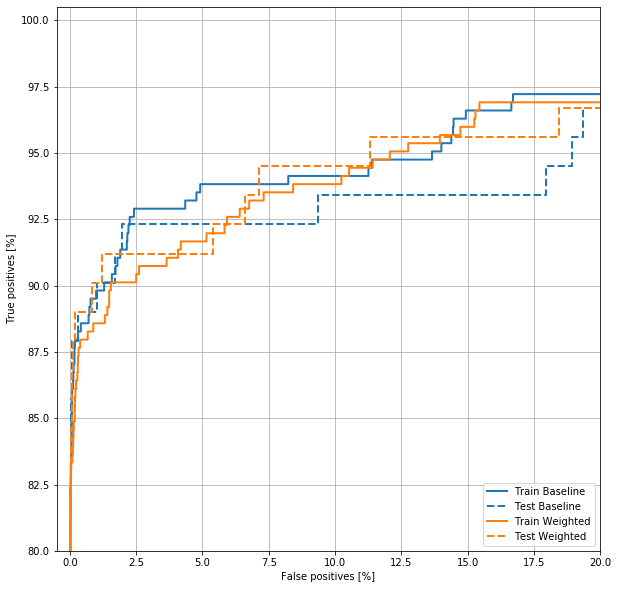

In [35]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color = colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color = colors[0], linestyle = '--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color = colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color = colors[1], linestyle = '--')

plt.legend(loc = 'lower right')

In [36]:
# Oversampling

pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [37]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(181952, 29)

In [38]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis = 0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis = 0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(363904, 29)

In [39]:
# sample using tf.data

BUFFER_SIZE = 100000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [40]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [ 0.96517768  0.80972101 -1.54950607  2.99132276  1.0037846  -0.64654658
  0.59741375 -0.14232937 -1.36605673  0.23864639  1.41695402 -0.28147171
 -0.7593841  -2.87417304 -1.86377601  1.81265261  2.26764629  1.41995288
 -1.88346396 -0.30620283 -0.20955468 -0.50006833  0.0713205  -0.401312
  0.33150103 -0.00416571 -0.06606546  0.01605281 -0.48801043]

Label:  1


In [41]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights = [0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [42]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.50146484375


In [43]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

278.0

In [44]:
# Train on oversampled data

resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs = EPOCHS,
    steps_per_epoch = resampled_steps_per_epoch,
    callbacks = [early_stopping],
    validation_data = val_ds)

Train for 278.0 steps, validate for 23 steps
Epoch 1/10
278/278 [==============================] - 12s 43ms/step - loss: 0.3836 - tp: 242838.0000 - fp: 61475.0000 - tn: 222821.0000 - fn: 42210.0000 - accuracy: 0.8179 - precision: 0.7980 - recall: 0.8519 - auc: 0.9082 - val_loss: 0.2161 - val_tp: 62.0000 - val_fp: 993.0000 - val_tn: 44499.0000 - val_fn: 15.0000 - val_accuracy: 0.9779 - val_precision: 0.0588 - val_recall: 0.8052 - val_auc: 0.9407
Epoch 2/10
278/278 [==============================] - 9s 33ms/step - loss: 0.1918 - tp: 260509.0000 - fp: 14162.0000 - tn: 270586.0000 - fn: 24087.0000 - accuracy: 0.9328 - precision: 0.9484 - recall: 0.9154 - auc: 0.9767 - val_loss: 0.1132 - val_tp: 63.0000 - val_fp: 774.0000 - val_tn: 44718.0000 - val_fn: 14.0000 - val_accuracy: 0.9827 - val_precision: 0.0753 - val_recall: 0.8182 - val_auc: 0.9444
Epoch 3/10
278/278 [==============================] - 9s 32ms/step - loss: 0.1464 - tp: 264373.0000 - fp: 9270.0000 - tn: 275163.0000 - fn: 20538.00

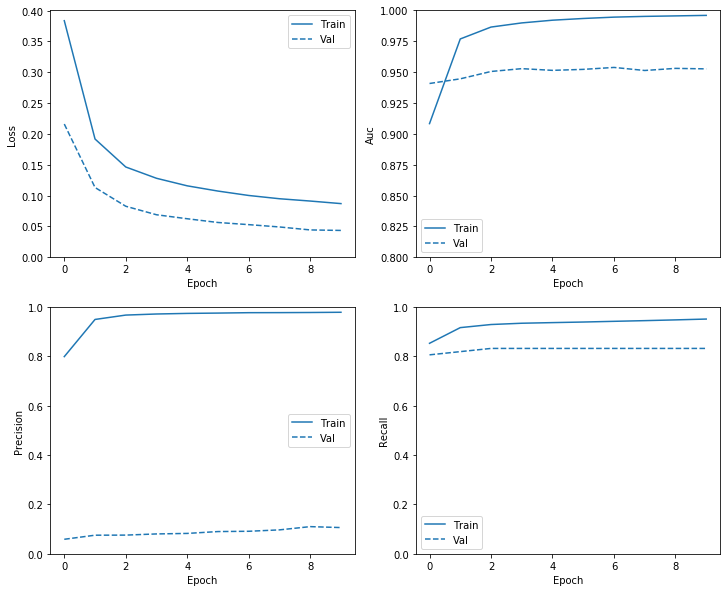

In [45]:
plot_metrics(resampled_history )

In [46]:
# Resampling and re-training to avoid overfit

resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch = 20,
    epochs = EPOCHS,
    callbacks = [early_stopping],
    validation_data = (val_ds))

Train for 20 steps, validate for 23 steps
Epoch 1/10
20/20 [==============================] - 3s 173ms/step - loss: 0.8529 - tp: 11348.0000 - fp: 8714.0000 - tn: 11716.0000 - fn: 9182.0000 - accuracy: 0.5631 - precision: 0.5656 - recall: 0.5528 - auc: 0.5876 - val_loss: 0.6309 - val_tp: 61.0000 - val_fp: 14997.0000 - val_tn: 30495.0000 - val_fn: 16.0000 - val_accuracy: 0.6705 - val_precision: 0.0041 - val_recall: 0.7922 - val_auc: 0.8350
Epoch 2/10
20/20 [==============================] - 1s 27ms/step - loss: 0.5888 - tp: 15225.0000 - fp: 8186.0000 - tn: 12289.0000 - fn: 5260.0000 - accuracy: 0.6717 - precision: 0.6503 - recall: 0.7432 - auc: 0.7703 - val_loss: 0.5961 - val_tp: 65.0000 - val_fp: 12353.0000 - val_tn: 33139.0000 - val_fn: 12.0000 - val_accuracy: 0.7287 - val_precision: 0.0052 - val_recall: 0.8442 - val_auc: 0.8825
Epoch 3/10
20/20 [==============================] - 1s 36ms/step - loss: 0.4844 - tp: 16942.0000 - fp: 7394.0000 - tn: 13040.0000 - fn: 3584.0000 - accuracy: 0

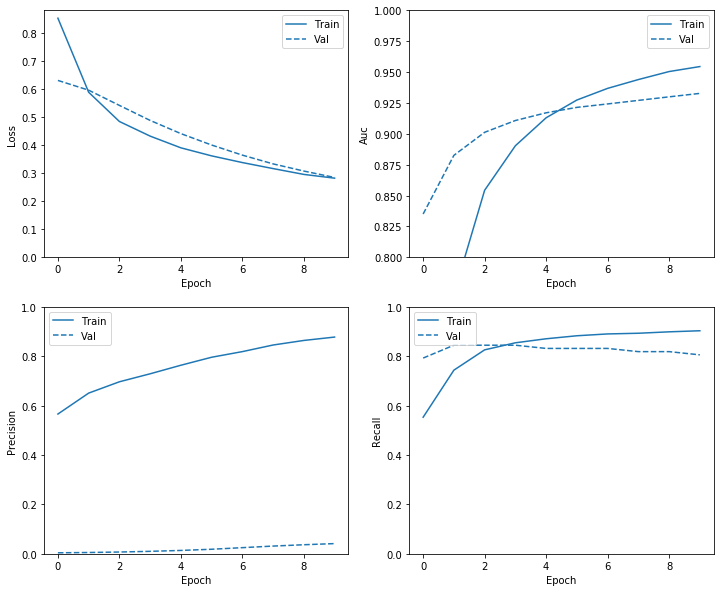

In [47]:
plot_metrics(resampled_history)

In [48]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size = BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size = BATCH_SIZE)

loss :  0.2823081708896998
tp :  84.0
fp :  1789.0
tn :  55082.0
fn :  7.0
accuracy :  0.9684702
precision :  0.04484784
recall :  0.9230769
auc :  0.97457373

Legitimate Transactions Detected (True Negatives):  55082
Legitimate Transactions Incorrectly Detected (False Positives):  1789
Fraudulent Transactions Missed (False Negatives):  7
Fraudulent Transactions Detected (True Positives):  84
Total Fraudulent Transactions:  91


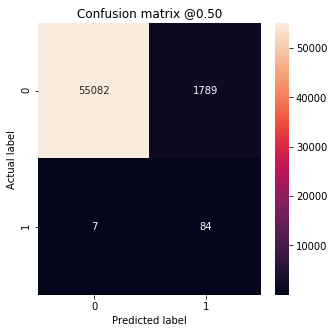

In [49]:
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size = BATCH_SIZE, verbose = 0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)